In [6]:
import metview as mv
import rioxarray 
import geopandas

mv.setoutput('jupyter', output_font_scale=1.5, plot_widget=False)

In [8]:
# Area del parque
park_boundary = geopandas.read_file('./cerro_saroche/poligono_cerro_saroche/cerro_saroche.shp')
park_bound_sin = park_boundary.to_crs(precipitacion_rds.rio.crs)

#### Elevación

In [9]:
elevacion_park = mv.read('./cerro_saroche/SRTMGL3/elevacion_cerro_saroche_clip.nc')
elevacion_park.variables()

['y', 'x', 'band', 'spatial_ref', 'elevacion']

In [10]:
elevacion_rectangulo = mv.read('./cerro_saroche/SRTMGL3/elevacion_rectangulo_clip.nc')
elevacion_rectangulo.variables()

['y', 'x', 'band', 'spatial_ref', 'elevacion']

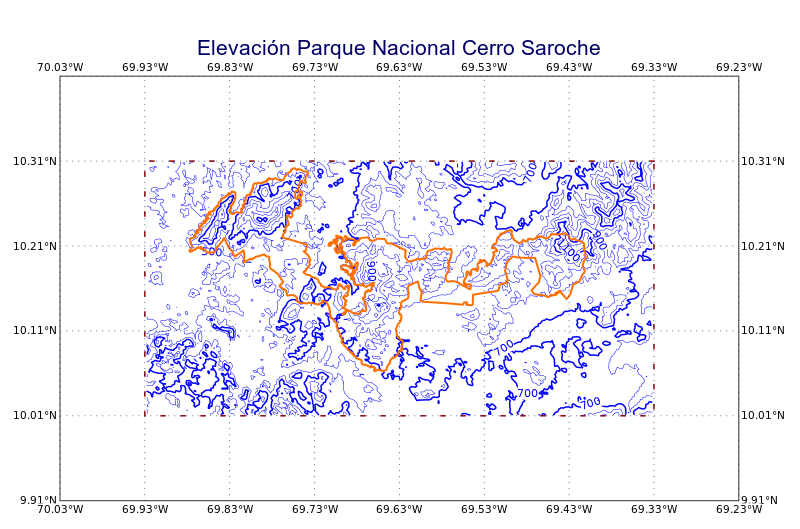

In [29]:
nvis = mv.netcdf_visualiser(netcdf_data=elevacion_rectangulo,
                            netcdf_plot_type='geo_matrix',
                            netcdf_latitude_variable='y',
                            netcdf_longitude_variable='x',
                            netcdf_value_variable='elevacion')

elevacion_shade_grid = mv.mcont(legend='on',
                                contour='on',
                                #contour_level_selection_type='interval',
                                #contour_interval=500,
                                #contour_min_level=500,
                                #contour_max_level=2000,
                                contour_shade='on',
                                contour_shade_technique='grid_shading',
                                #contour_shade_cell_resolution=20,
                                contour_shade_colour_method='palette',
                                contour_shade_palette_name='norway_green_7')


coast = mv.mcoast(
                    map_grid_colour              = "RGB(0.1358,0.201,0.4367)",
                    map_grid_latitude_increment=0.1,
                    map_grid_longitude_increment=0.1,
                    map_grid_latitude_reference=10.31,
                    map_grid_longitude_reference=-69.83,
                    map_grid_line_style="dot",
                    map_label_height=0.3,
                  )

crete_map = mv.geoview(map_area_definition='corners',
                       #area=[10.31,-69.93,10.01,-69.33],
                       area=park_area,
                       coastlines=coast)

#-------------------------
# poligono
poligono_coords = list(park_bound_sin.exterior.geometry.iloc[0].coords)

latPos = [x[1] for x in poligono_coords]
lonPos = [x[0] for x in poligono_coords]
incr = 1

pltLst = []

# define visualiser
vis = mv.mvl_geopolyline(latPos, lonPos, incr)
graph_area_park = mv.mgraph(
                        graph_type="curve",
                        graph_shade_colour="RGB(255,111,0)",
                        graph_line_colour="RGB(255,111,0)",
                        graph_line_thickness="4",
                        graph_line_style="solid",
                    )

pltLst.extend([vis, graph_area_park])
#-------------------------
# rectangulo
latPos = [10.31,10.01,10.01,10.31,10.31]
lonPos = [-69.93,-69.93,-69.33,-69.33,-69.93]
incr = 1

# define visualiser
vis = mv.mvl_geopolyline(latPos, lonPos, incr)
graph_area = mv.mgraph(
                  graph_type="curve",
                  graph_line_colour="RGB(141,0,0)",
                  graph_line_thickness="3",
                  graph_line_style="chain_dot",
              )


pltLst.extend([vis, graph_area])

# titulo
title = mv.mtext(
    text_lines=['Elevación Parque Nacional Cerro Saroche'],
    text_font_size=0.6,
    text_justification='centre',
    text_orientation='horizontal'
    )

mv.plot(crete_map, nvis, pltLst, title)